In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
#from sklearn.neural_network import MLPClassifier
#from sklearn import tree 
#from sklearn import neighbors
'''
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #设置seaborn画图的背景为白色
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
'''

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import classification_report\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.model_selection import train_test_split\n\nfrom sklearn import preprocessing\nimport matplotlib.pyplot as plt \nplt.rc("font", size=14)\nimport seaborn as sns\nsns.set(style="white") #设置seaborn画图的背景为白色\nsns.set(style="whitegrid", color_codes=True)\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n'

In [ ]:
! 

In [4]:
tf=pd.read_csv('TQQQ.csv')
#tf
sqqq=pd.read_csv('SQQQ.csv')
sqqq=sqqq['SQQQ.Adjusted']
tf

,Unnamed: 0,QQQ.Adjusted
0,1,122.938194
1,2,123.350868
2,3,124.080254
3,4,124.041862
4,5,124.579285
...,...,...
1419,1420,273.529999
1420,1421,282.130005
1421,1422,281.980011
1422,1423,279.760010


In [ ]:
train=pd.read_csv('training.csv')
train=train.iloc[:,0]
test=pd.read_csv('testing.csv')
test=test.iloc[:,0]
diff=pd.read_csv('percent.csv')
pct=diff.iloc[:,0]
type(pct)
train

In [ ]:
# function for 10-fold cross validation，and confusion matrix
def fold(model,x,y):
    model.fit(x,y)
    a=cross_val_score(model, x, y, scoring='accuracy', cv=10, n_jobs=1)
    print('precision is :', np.mean(a))
    print(classification_report(y, model.predict(x)))
    print(confusion_matrix(y, model.predict(x)))
    return np.mean(a)
    

# new data, last five pct change
Use this to predict up or down

Consider change the fivepart or tpart things. eg. b=pct[i+6]>0.025

In [ ]:
fivepart=[]   #
tpart=[]   # increase is 1
for i in range(len(pct)-6):
    a=pct[i:i+5]
    b=pct[i+6]>0.025
    fivepart.append(a)
    tpart.append(b)
fivepart=np.array(fivepart)
tpart=np.array(tpart)
x=fivepart
y=tpart
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(fivepart, tpart, test_size=.1,random_state=0)   # usually used to seperate data

Accurary function

In [ ]:
def foldt(model,x,y):
    print('-----------------------------------')
    X_train, X_test, y_train, y_test = train_test_split(fivepart, tpart, test_size=.2,random_state=0)
    a=cross_val_score(model, x, y, scoring='accuracy', cv=100, n_jobs=1)
    print('precision is :', np.mean(a))
    model.fit(X_train,y_train)
    print(classification_report(y_test, model.predict(X_test)))
    print(confusion_matrix(y_test, model.predict(X_test)))
    print('train confusion matrix')
    print(classification_report(y_train, model.predict(X_train)))
    return np.mean(a)

In [ ]:
from sklearn.linear_model import LogisticRegression
# 定义逻辑回归模型
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
    fit_intercept=True, intercept_scaling=1, class_weight=None, 
    random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
    verbose=0, warm_start=False, n_jobs=1)

svc=SVC()
mlp = MLPClassifier()

In [ ]:
fold(lr,x,y)
fold(svc,x,y)
#fold(mlp,x,y)

# Compare the results of different method

In [ ]:
lr1 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
    fit_intercept=True, intercept_scaling=1, class_weight=None, 
    random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
    verbose=0, warm_start=False, n_jobs=1)
from sklearn import neighbors
#定义kNN分类模型
knn = neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=1) # 分类
#a=cross_val_score(lr1, x, y, scoring='accuracy', cv=100, n_jobs=1)
trm = tree.DecisionTreeClassifier(criterion='gini', max_depth=None,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    max_features=None, random_state=None, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, min_impurity_split=None,
     class_weight=None)
print('lr1')
foldt(lr1,x,y)   # good for false detector, and overall higher even for b>0.02
#np.mean(a)
print('svc')
foldt(svc,x,y)  # same effective for true and false
#foldt(mlp,x,y)
print('knn')
foldt(knn,x,y)
print('tree')
foldt(trm,x,y)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(lr, x, y, scoring='accuracy', cv=10, n_jobs=1)
np.mean(a)

# percision test function

In [ ]:
def percision(a,b):
    if len(a)!=len(b):
        print('Wrong length')
    else:
        c=a-b
        rightnum=sum(c==0)
        return rightnum/len(a)
        print(rightnum/len(a))

In [ ]:
time=list(range(len(train)))
vol=tf['QQQ.Volume']
plt.plot(time,vol)

In [ ]:
time=list(range(len(train)))
plt.plot(time,pct)

In [ ]:
ud=[]
for i in range(len(pct)):
    if pct[i]>2.5 or pct[i]<-2.5:
        ud.append(1)
    else:
        ud.append(0)
ud

ud=np.array(ud)

acol=['QQQ.Volume','QQQ.Adjusted']
x=tf[acol]
lr0=LogisticRegression(solver='sag',max_iter=700)
lr0.fit(x,ud.reshape(-1))
a=lr0.predict(x)
a=np.array(a)
a




In [ ]:
k1205=lr0.predict_proba(x)

tvalue=k1205[:,0]
t2=tvalue-0.7
t2=t2<0
t2=t2+0     # useful way

percision(t2,ud)
co=t2-ud
sum(co==0)/len(ud)

In [ ]:
percision(a,ud)

# This said that if I choose all the point are not special event, my accuracy is 0.9. 手动调参反而效果更差。

In [ ]:
x=np.array([[0],[1],[0]])
y=np.array([0,1,0])
lr1=LogisticRegression()
lr1.fit(x,y)


# This begin our model

# 0 
# Martingale Method

In [3]:
train=pd.read

begin=10000
cp=0.01
om=10000
sellrate=1.12
share=0
avginp=0 # average in market price

def buy(a):   #buy share
    global om
    global share
    global cp
    global avginp
    avginp=(avginp*share+a*cp)/(share+a)
    share+=a
    om-=a*cp
    
    
def sell(a):  #sell share  a in shares
    global om
    global cp
    global share
    global avginp
    out=a*cp
    om+=out
    share-=a
    if share==0:
        avginp=0
 
begin=10000
cp=0.01
om=10000
sellrate=1.12
share=0
avginp=0 # average in market price

def model0():
    global om
    global cp
    global share
    global avginp
    global yr
    global year
    year=251
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    for i in range(len(train)):
        cp=train[i]
        total=om+share*cp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=sellrate and share>0:
            sell(share)
        if (pct[i]<= -0.05) and om>=1000:   #当天跌5%
            buy(1000/cp)
    
    plt.plot(time,tt,label = "line 1")
    plt.title("naive strategy")
    yr=pd.Series(yr)
    print(yr)
    tpct=yr.pct_change()
    tpct=tpct[1:]
    print(tpct)   # percent increase of a year
    print('Mean percentage of a year:')
    print(np.mean(tpct))
#share

    plt.show()
    print('All from begin profit rate',total/10000*100, "%")
    print('Total final:',total)
model0()




AttributeError: module 'pandas' has no attribute 'read'

In [ ]:
16193.696631/12254.288314

# Model 1
greedy 15%

In [ ]:
train=tf['QQQ.Adjusted']
train

begin=10000
cp=0.01
om=10000
sellrate=1.15
share=0
avginp=0 # average in market price

def model1():
    global om
    global cp
    global share
    global avginp
    global yr
    global year
    year=251  # this means 
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    for i in range(len(train)):
        cp=train[i]
        total=om+share*cp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=sellrate and share>0:
            sell(share)
        if (pct[i]<= -0.05) and om>=1000:   #当天跌5%
            buy(1000/cp)
    
    plt.plot(time,tt,label = "line 1")
    plt.title("naive strategy")
    yr=pd.Series(yr)
    print(yr)
    tpct=yr.pct_change()
    tpct=tpct[1:]
    print(tpct)   # percent increase of a year
    print('Mean percentage of a year:')
    print(np.mean(tpct))
#share

    plt.show()
    print('All from begin profit rate',total/10000*100, "%")
    print('Total final:',total)
model1()

# Model 2
greedy 20%

In [ ]:
begin=10000
cp=0.01
om=10000
sellrate=1.20
share=0
avginp=0 # average in market price


def model1():
    global om
    global cp
    global share
    global avginp
    global yr
    global year
    year=251  # this means 
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    for i in range(len(train)):
        cp=train[i]
        total=om+share*cp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=sellrate and share>0:
            sell(share)
        if (pct[i]<= -0.05) and om>=1000:   #当天跌5%
            buy(1000/cp)
    
    plt.plot(time,tt,label = "line 1")
    plt.title("naive strategy")
    yr=pd.Series(yr)
    print(yr)
    tpct=yr.pct_change()
    tpct=tpct[1:]
    print(tpct)   # percent increase of a year
    print('Mean percentage of a year:')
    print(np.mean(tpct))
#share

    plt.show()
    print('All from begin profit rate',total/10000*100, "%")
    print('Total final:',total)
model1()

# New with SQQQ Model

0    10000.000000
1    11167.765216
2     6697.216018
3     2571.240650
dtype: float64
1    0.116777
2   -0.400308
3   -0.616073
dtype: float64
Mean percentage of a year:
-29.98683320330689 %


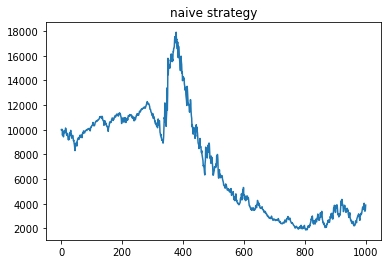

All from begin profit rate -61.113681935405275 %
Total final: 3888.6318064594725
Execution Count:  20


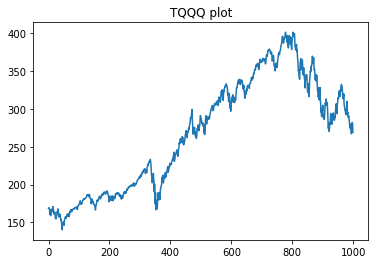

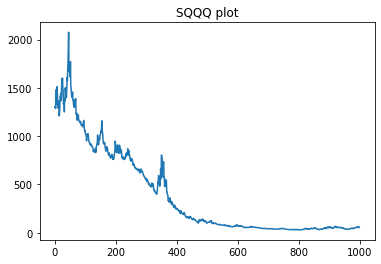

current situation:
2.400000000000001
1.2
TQQQ shares:  0.00969484980033212
SQQQ shares:  65.78674322532646
om:  0.0


0.11677652158243967

In [43]:
tf=pd.read_csv('TQQQ.csv')

train=tf['QQQ.Adjusted']

sqqq=pd.read_csv('SQQQ.csv')
sqqq=sqqq['SQQQ.Adjusted']


after=len(tqqq)-1000 # after this point
train=train[after:]
train=train.reset_index()
train=train['QQQ.Adjusted']
sqqq=sqqq[after:]
sqqq=sqqq.reset_index()
sqqq=sqqq['SQQQ.Adjusted']

begin=10000
cp=0.01 # current price
scp=0.01
om=10000
sellrate=1.05
goalrate=0.05
overrate=sellrate
soverrate=sellrate
ratio=0.25

share=0
sshare=0
avginp=0 # average in market price
savginp=0 
ext=1 #execution counts

def buy(a):   #buy share
    global om
    global share
    global cp
    global avginp
    avginp=(avginp*share+a*cp)/(share+a)
    share+=a
    om-=a*cp
    
    
def sell(a):  #sell share  a in shares
    global om
    global cp
    global share
    global avginp
    out=a*cp
    om+=out
    share-=a
    if share==0:
        avginp=0

def sbuy(a):   #buy share
    global om
    global sshare
    global scp
    global savginp
    savginp=(savginp*sshare+a*scp)/(sshare+a)
    sshare+=a
    om-=a*scp
    
    
def ssell(a):  #sell share  a in shares
    global om
    global scp
    global sshare
    global savginp
    out=a*scp
    om+=out
    sshare-=a
    if sshare==0:
        savginp=0          
        
def model1(sellrate=1.2,goalrate=0.05,ratio=0.5):
    global om
    global cp
    global share
    global avginp
    global sshare
    global scp
    global savginp
    ext=1
    '''
    global ext
    global sellrate
    global overrate
    global soverrate
    '''
    overrate=sellrate
    soverrate=sellrate
    #global yr
    #global year
    #global ratio
    ratio=0.5
    #tos=0
    #tot=0
    
    year=251  # this means 251 execution days
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    cp=train[0]
    scp=sqqq[0]
    #sbuy(5000/scp)
    buy(om/cp)
    
    for i in range(len(train)):
        #print('share is ', share)
        cp=train[i]
        scp=sqqq[i]
        total=om+share*cp+sshare*scp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=overrate and share>0:
            sell(share*ratio)
            sbuy(om/scp)
            ext+=1
            overrate+=goalrate
            '''
            print('cp ',cp)
            print('share ',share)
            print('om: ',om)
            '''
        if savginp!=0 and scp/savginp>=soverrate and sshare>0:
            ssell(sshare*ratio)
            buy(om/cp)
            ext+=1
            soverrate+=goalrate
            
        if avginp !=0 and cp/avginp<=sellrate:
            overrate=sellrate
        
        if savginp !=0 and scp/savginp<=sellrate:
            soverrate=sellrate
        
    
    
    plt.plot(time,tt,label = "line 1")
    plt.title("naive strategy")
    yr=pd.Series(yr)
    print(yr)
    tpct=yr.pct_change()
    tpct=tpct[1:]
    
    print(tpct)   # percent increase of a year
    print('Mean percentage of a year:')
    print(np.mean(tpct)*100,'%')
#share

    plt.show()
    print('All from begin profit rate',total/10000*100-100, "%")
    print('Total final:',total)
    print('Execution Count: ',ext)
    plt.plot(list(range(len(train))),train)
    plt.title('TQQQ plot')
    plt.show()
    
    plt.plot(list(range(len(sqqq))),sqqq)
    plt.title('SQQQ plot')
    plt.show()
    print("current situation:")
    print(overrate)
    print(soverrate)
    print('TQQQ shares: ',share)
    print('SQQQ shares: ', sshare)
    print('om: ',om)
    return (yr.pct_change()[1])
    #print(share*cp)
sellrate=1.2
goalrate=0.05
overrate=sellrate
soverrate=sellrate
ratio=0.7 # part of it transfer to sqqq/tqqq
model1(sellrate=1.2,goalrate=0.1,ratio=0.5)

# only output

In [40]:


def buy(a):   #buy share
    global om
    global share
    global cp
    global avginp
    avginp=(avginp*share+a*cp)/(share+a)
    share+=a
    om-=a*cp
    
    
def sell(a):  #sell share  a in shares
    global om
    global cp
    global share
    global avginp
    out=a*cp
    om+=out
    share-=a
    if share==0:
        avginp=0

def sbuy(a):   #buy share
    global om
    global sshare
    global scp
    global savginp
    savginp=(savginp*sshare+a*scp)/(sshare+a)
    sshare+=a
    om-=a*scp
    
    
def ssell(a):  #sell share  a in shares
    global om
    global scp
    global sshare
    global savginp
    out=a*scp
    om+=out
    sshare-=a
    if sshare==0:
        savginp=0          



def model2(sellrate=1.2,goalrate=0.05,ratio=0.5):
    global om
    global cp
    global share
    global avginp
    global sshare
    global scp
    global savginp
    ext=1
    '''
    global ext
    global sellrate
    global overrate
    global soverrate
    '''
    overrate=sellrate
    soverrate=sellrate
    #global yr
    #global year
    #global ratio
    ratio=0.5
    #tos=0
    #tot=0
    
    year=251  # this means 251 execution days
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    cp=train[0]
    scp=sqqq[0]
    #sbuy(5000/scp)
    buy(om/cp)
    
    for i in range(len(train)):
        #print('share is ', share)
        cp=train[i]
        scp=sqqq[i]
        total=om+share*cp+sshare*scp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=overrate and share>0:
            sell(share*ratio)
            sbuy(om/scp)
            ext+=1
            overrate+=goalrate
            '''
            print('cp ',cp)
            print('share ',share)
            print('om: ',om)
            '''
        if savginp!=0 and scp/savginp>=soverrate and sshare>0:
            ssell(sshare*ratio)
            buy(om/cp)
            ext+=1
            soverrate+=goalrate
            
        if avginp !=0 and cp/avginp<=sellrate:
            overrate=sellrate
        
        if savginp !=0 and scp/savginp<=sellrate:
            soverrate=sellrate
    
    yr=pd.Series(yr)
    
    tpct=yr.pct_change()
    tpct=tpct[1]
    
    return ((tpct)*100)
#model2(sellrate=1.2,goalrate=0.1,ratio=0.5)

sl=[1.05,1.1,1.2,1.25,1.3,1.4,1.5]
gr=[0.05,0.1,0.15,0.2]
rl=[0.1,0.2,0.3,0.5,0.7,0.9]
l=[]
for i in range(100):
    after=random.randrange(1, len(tqqq)-251,1)
    tf=pd.read_csv('TQQQ.csv')
    train=tf['QQQ.Adjusted']
    sqqq=pd.read_csv('SQQQ.csv')
    sqqq=sqqq['SQQQ.Adjusted']
    
    #after=2700 # after this point
    train=train[after:]
    
    train=train.reset_index()
    train=train['QQQ.Adjusted']
    sqqq=sqqq[after:]
    sqqq=sqqq.reset_index()
    sqqq=sqqq['SQQQ.Adjusted']
    
    
    begin=10000
    cp=0.01 # current price
    scp=0.01
    om=10000
    sellrate=1.05
    goalrate=0.05
    overrate=sellrate
    soverrate=sellrate
    ratio=0.25
    
    share=0
    sshare=0
    avginp=0 # average in market price
    savginp=0 
    ext=1 #execution counts
    l.append(model2())
np.mean(l)

11.275482152413707

In [149]:
after=random.randrange(1, 3187-251,1)
tf=pd.read_csv('TQQQ.csv')
train=tf['QQQ.Adjusted']
print(train)

0        38.728451
1        38.808254
2        39.304893
3        39.526615
4        39.774929
           ...    
3182    273.529999
3183    282.130005
3184    281.980011
3185    279.760010
3186    269.100006
Name: QQQ.Adjusted, Length: 3187, dtype: float64


# find parameters

In [16]:
#train=pd.read_csv('TQQQ.csv')

def buy(a):   #buy share
    global om
    global share
    global cp
    global avginp
    avginp=(avginp*share+a*cp)/(share+a)
    share+=a
    om-=a*cp
    
    
def sell(a):  #sell share  a in shares
    global om
    global cp
    global share
    global avginp
    out=a*cp
    om+=out
    share-=a
    if share==0:
        avginp=0

def sbuy(a):   #buy share
    global om
    global sshare
    global scp
    global savginp
    savginp=(savginp*sshare+a*scp)/(sshare+a)
    sshare+=a
    om-=a*scp
    
    
def ssell(a):  #sell share  a in shares
    global om
    global scp
    global sshare
    global savginp
    out=a*scp
    om+=out
    sshare-=a
    if sshare==0:
        savginp=0          



def model2(sellrate=1.2,goalrate=0.05,ratio=0.5):
    global om
    global cp
    global share
    global avginp
    global sshare
    global scp
    global savginp
    ext=1
    '''
    global ext
    global sellrate
    global overrate
    global soverrate
    '''
    overrate=sellrate
    soverrate=sellrate
    #global yr
    #global year
    #global ratio
    #ratio=0.5
    #tos=0
    #tot=0
    
    year=251  # this means 251 execution days
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    cp=train[0]
    scp=sqqq[0]
    #sbuy(5000/scp)
    buy(om/cp)
    
    for i in range(len(train)):
        #print('share is ', share)
        cp=train[i]
        scp=sqqq[i]
        total=om+share*cp+sshare*scp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=overrate and share>0:
            sell(share*ratio)
            sbuy(om/scp)
            ext+=1
            overrate+=goalrate
            '''
            print('cp ',cp)
            print('share ',share)
            print('om: ',om)
            '''
        if savginp!=0 and scp/savginp>=soverrate and sshare>0:
            ssell(sshare*ratio)
            buy(om/cp)
            ext+=1
            soverrate+=goalrate
            
        if avginp !=0 and cp/avginp<=sellrate:
            overrate=sellrate
        
        if savginp !=0 and scp/savginp<=sellrate:
            soverrate=sellrate
    
    yr=pd.Series(yr)
    
    tpct=yr.pct_change()
    tpct=tpct[1:]
    
    return (np.mean(tpct)*100)
#model2(sellrate=1.2,goalrate=0.1,ratio=0.5)

sl=[1.05,1.1,1.2,1.25,1.3,1.4,1.5]
gr=[0.05,0.1,0.15,0.2]
rl=[0.1,0.2,0.3,0.5,0.7,0.9]
l=[]

tqqq=pd.read_csv('TQQQ.csv')
tqqq=tqqq['QQQ.Adjusted']
sqqqf=pd.read_csv('SQQQ.csv')
sqqqf=sqqqf['SQQQ.Adjusted']

for i in range(100):
    #for j in sl:
        
    after=random.randrange(1, len(tqqq)-251,1)
    
    
    #after=2700 # after this point
    train=tqqq[after:]
    train=train.reset_index()
    train=train['QQQ.Adjusted']
    sqqq=sqqqf[after:]
    sqqq=sqqq.reset_index()
    sqqq=sqqq['SQQQ.Adjusted']
    
    
    begin=10000
    cp=0.01 # current price
    scp=0.01
    om=10000
    sellrate=1.05
    goalrate=0.05
    overrate=sellrate
    soverrate=sellrate
    ratio=0.25
    
    share=0
    sshare=0
    avginp=0 # average in market price
    savginp=0 
    ext=1 #execution counts
    l.append(model2())
np.mean(l)

-6.104329213771134

In [91]:
tqqq=pd.read_csv('TQQQ.csv')
tqqq=tqqq['QQQ.Adjusted']
len(tqqq)

1424

In [145]:
random.randrange(1, 3187-251,1)

265

# try different sellrate
## starting from 2017.2.10

In [79]:
#train=pd.read_csv('TQQQ.csv')

def buy(a):   #buy share
    global om
    global share
    global cp
    global avginp
    avginp=(avginp*share+a*cp)/(share+a)
    share+=a
    om-=a*cp
    
    
def sell(a):  #sell share  a in shares
    global om
    global cp
    global share
    global avginp
    out=a*cp
    om+=out
    share-=a
    if share==0:
        avginp=0

def sbuy(a):   #buy share
    global om
    global sshare
    global scp
    global savginp
    savginp=(savginp*sshare+a*scp)/(sshare+a)
    sshare+=a
    om-=a*scp
    
    
def ssell(a):  #sell share  a in shares
    global om
    global scp
    global sshare
    global savginp
    out=a*scp
    om+=out
    sshare-=a
    if sshare==0:
        savginp=0          



def model2(sellrate=1.2,goalrate=0.05,ratio=0.5):
    global om
    global cp
    global share
    global avginp
    global sshare
    global scp
    global savginp
    ext=1
    '''
    global ext
    global sellrate
    global overrate
    global soverrate
    '''
    overrate=sellrate
    soverrate=sellrate
    #global yr
    #global year
    #global ratio
    #ratio=0.5
    #tos=0
    #tot=0
    
    year=251  # this means 251 execution days
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    cp=train[0]
    scp=sqqq[0]
    #sbuy(5000/scp)
    buy(om/cp)
    
    for i in range(len(train)):
        #print('share is ', share)
        cp=train[i]
        scp=sqqq[i]
        total=om+share*cp+sshare*scp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=overrate and share>0:
            sell(share*ratio)
            sbuy(om/scp)
            ext+=1
            overrate+=goalrate
            '''
            print('cp ',cp)
            print('share ',share)
            print('om: ',om)
            '''
        if savginp!=0 and scp/savginp>=soverrate and sshare>0:
            ssell(sshare*ratio)
            buy(om/cp)
            ext+=1
            soverrate+=goalrate
            
        if avginp !=0 and cp/avginp<=sellrate:
            overrate=sellrate
        
        if savginp !=0 and scp/savginp<=sellrate:
            soverrate=sellrate
    
    yr=pd.Series(yr)
    
    tpct=yr.pct_change()
    #tpct=tpct[1:]
    output=tpct[1]
    
    return (output*100)
#model2(sellrate=1.2,goalrate=0.1,ratio=0.5)

sl=[1.2,1.5,1.6]
gr=[0.05,0.1,0.15,0.2]
rl=[0.1,0.2,0.3,0.5,0.7,0.9]
l=[]
s_output_l=[]
tqqq=pd.read_csv('TQQQ.csv')
tqqq=tqqq['QQQ.Adjusted']
sqqqf=pd.read_csv('SQQQ.csv')
sqqqf=sqqqf['SQQQ.Adjusted']
for j in sl:
    l=[]
    for i in range(1000):    
        after=random.randrange(1, len(tqqq)-251,1)
        #after=2700 # after this point
        train=tqqq[after:]
        train=train.reset_index()
        train=train['QQQ.Adjusted']
        sqqq=sqqqf[after:]
        sqqq=sqqq.reset_index()
        sqqq=sqqq['SQQQ.Adjusted']
        
        
        begin=10000
        cp=0.01 # current price
        scp=0.01
        om=10000
        sellrate=1.05
        goalrate=0.05
        overrate=sellrate
        soverrate=sellrate
        ratio=0.25
        
        share=0
        sshare=0
        avginp=0 # average in market price
        savginp=0 
        ext=1 #execution counts
        l.append(model2(j,0.1,0.5))
    s_output_l.append(np.mean(l))
s_output_l

[10.486046277985533, 19.84233247326552, 21.54215166505076]

# for different overrate:


In [98]:
#train=pd.read_csv('TQQQ.csv')

def buy(a):   #buy share
    global om
    global share
    global cp
    global avginp
    avginp=(avginp*share+a*cp)/(share+a)
    share+=a
    om-=a*cp
    
    
def sell(a):  #sell share  a in shares
    global om
    global cp
    global share
    global avginp
    out=a*cp
    om+=out
    share-=a
    if share==0:
        avginp=0

def sbuy(a):   #buy share
    global om
    global sshare
    global scp
    global savginp
    savginp=(savginp*sshare+a*scp)/(sshare+a)
    sshare+=a
    om-=a*scp
    
    
def ssell(a):  #sell share  a in shares
    global om
    global scp
    global sshare
    global savginp
    out=a*scp
    om+=out
    sshare-=a
    if sshare==0:
        savginp=0          



def model2(sellrate=1.2,goalrate=0.05,ratio=0.5):
    global om
    global cp
    global share
    global avginp
    global sshare
    global scp
    global savginp
    ext=1
    '''
    global ext
    global sellrate
    global overrate
    global soverrate
    '''
    overrate=sellrate
    soverrate=sellrate
    #global yr
    #global year
    #global ratio
    #ratio=0.5
    #tos=0
    #tot=0
    
    year=251  # this means 251 execution days
    yr=[] # yearly 
    tt=[]
    time=list(range(len(train)))
    cp=train[0]
    scp=sqqq[0]
    #sbuy(5000/scp)
    buy(om/cp)
    
    for i in range(len(train)):
        #print('share is ', share)
        cp=train[i]
        scp=sqqq[i]
        total=om+share*cp+sshare*scp
        tt.append(total)
        if i%year==0:
            yr.append(total)
        if avginp!=0 and cp/avginp>=overrate and share>0:
            sell(share*ratio)
            sbuy(om/scp)
            ext+=1
            overrate+=goalrate
            '''
            print('cp ',cp)
            print('share ',share)
            print('om: ',om)
            '''
        if savginp!=0 and scp/savginp>=soverrate and sshare>0:
            ssell(sshare*ratio)
            buy(om/cp)
            ext+=1
            soverrate+=goalrate
            
        if avginp !=0 and cp/avginp<=sellrate:
            overrate=sellrate
        
        if savginp !=0 and scp/savginp<=sellrate:
            soverrate=sellrate
    
    yr=pd.Series(yr)
    
    tpct=yr.pct_change()
    #tpct=tpct[1:]
    output=tpct[1]
    
    return (output*100)
#model2(sellrate=1.2,goalrate=0.1,ratio=0.5)

sl=[1.2,1.5,1.6]
gr=[0.05,0.1,0.15,0.2]
rl=[0.1,0.2,0.3,0.5,0.7,0.9]
l=[]
s_output_l=[]
tqqq=pd.read_csv('TQQQ.csv')
tqqq=tqqq['QQQ.Adjusted']
print(len(tqqq))
sqqqf=pd.read_csv('SQQQ.csv')
sqqqf=sqqqf['SQQQ.Adjusted']
for j in sl:
    l=[]
    for k in gr:
        kl=[]
        for i in range(1000):    
            after=random.randrange(1, len(tqqq)-251,1)
            #after=2700 # after this point
            train=tqqq[after:]
            train=train.reset_index()
            train=train['QQQ.Adjusted']
            sqqq=sqqqf[after:]
            sqqq=sqqq.reset_index()
            sqqq=sqqq['SQQQ.Adjusted']
            
            
            begin=10000
            cp=0.01 # current price
            scp=0.01
            om=10000
            sellrate=1.05
            goalrate=0.05
            overrate=sellrate
            soverrate=sellrate
            ratio=0.25
            
            share=0
            sshare=0
            avginp=0 # average in market price
            savginp=0 
            ext=1 #execution counts
            kl.append(model2(j,k,0.5))
        l.append(np.mean(kl))
    s_output_l.append(l)
np.array(s_output_l)

1424


array([[12.31872212, 11.81572478, 11.23017057, 10.06679666],
       [20.57982601, 20.5137793 , 19.90249486, 20.42899656],
       [22.38603637, 19.97814337, 20.75987988, 21.83203623]])